# Assignment 2 : Rain in Australia 

## A. Creating Spark Session and Loading the Data

### Step 01: Import Spark Session and initialize Spark
pyspark is the Spark Python API that exposes the Spark programming model to Python. You are already familiar with sparkContext from Assignment 1. sparkContext was used as a channel to access all spark functionality. In order to use APIs of SQL, HIVE, and Streaming, separate contexts need to be created. From SPARK 2.0.0 onwards sparkSession provides a single point of entry to interact with underlying Spark functionality and allows programming Spark with Dataframe and Dataset APIs. All the functionality available with sparkContext are also available in sparkSession.

Write the code to create a sparkSession object, with 4 local cores. To create a sparkSession with 4 core you have to use configure it as local[4]. Give a name to your program using appName ().

In [1]:
# Create entry points to spark
from pyspark import SparkContext # Spark
from pyspark.sql import SparkSession # Spark SQL

# We add this line to avoid an error : "Cannot run multiple SparkContexts at once". 
# If there is an existing spark context, we will reuse it instead of creating a new context.
sc = SparkContext.getOrCreate()

# local[*]: run Spark locally with as many working processors as logical cores on your machine.
# In the field of `master`, we use a local server with as many working processors (or threads) as possible (i.e. `local[*]`). 
# If we want Spark to run locally with 'k' worker threads, we can specify as `local[k]`.
# The `appName` field is a name to be shown on the Sparking cluster UI. 

# If there is no existing spark context, we now create a new context
if (sc is None):
    sc = SparkContext(master="local[4]").appName("Rain Prediction")
spark = SparkSession(sparkContext=sc)

### Step 02: Load the dataset and print the schema and total number of entries
In sparkSession you can use spark_session.read.csv() method to load data as CSV
format. You can download the dataset from Moodle. After you load the csv file into a
dataframe using spark session, write the code to print the total number of entries in the dataset.

### Read dataset

In [2]:
# Read the data from csv file
weather = spark.read.option('header', 'true').csv('weatherAUS.csv', inferSchema=True)

### Print Schema

In [3]:
# show schema
weather.printSchema()

root
 |-- Date: timestamp (nullable = true)
 |-- Location: string (nullable = true)
 |-- MinTemp: string (nullable = true)
 |-- MaxTemp: string (nullable = true)
 |-- Rainfall: string (nullable = true)
 |-- Evaporation: string (nullable = true)
 |-- Sunshine: string (nullable = true)
 |-- WindGustDir: string (nullable = true)
 |-- WindGustSpeed: string (nullable = true)
 |-- WindDir9am: string (nullable = true)
 |-- WindDir3pm: string (nullable = true)
 |-- WindSpeed9am: string (nullable = true)
 |-- WindSpeed3pm: string (nullable = true)
 |-- Humidity9am: string (nullable = true)
 |-- Humidity3pm: string (nullable = true)
 |-- Pressure9am: string (nullable = true)
 |-- Pressure3pm: string (nullable = true)
 |-- Cloud9am: string (nullable = true)
 |-- Cloud3pm: string (nullable = true)
 |-- Temp9am: string (nullable = true)
 |-- Temp3pm: string (nullable = true)
 |-- RainToday: string (nullable = true)
 |-- RainTomorrow: string (nullable = true)



### Count number of rows and show the result

In [4]:
# Count the number of entries
record_count = weather.count()

In [5]:
# Print the result
print('There are ',record_count, ' records in the dataset')

There are  142193  records in the dataset


## B. Data Cleaning and Processing
Data cleaning and processing is an important aspect for any machine learning task. We have to carefully look into the data and based on the types, quality of the data, we have to plan our cleaning procedures.

### Step 03: Delete columns from the dataset
During the data cleaning and processing phase, we delete unnecessary data from
the dataset to improve the efficiency and accuracy of our model. You have to think
which columns are not contributing to the rain prediction. To keep things simple, you are required to delete the following columns due to data quality and accuracy.
- Date
- Location
- Evaporation
- Sunshine
- Cloud9am
- Cloud3pm
- Temp9am
- Temp3pm

However, if you want to keep any of these columns, you can keep them if you process
them in an intelligent way that improve the accuracy, that is fine, however not
mandatory .

### Drop useless columns and show the result

In [6]:
# Drop unneeded columns
new_weather = weather.drop('Date', 'Location', 'Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm')

In [7]:
# Show three rows of the cleaned dataframe
new_weather.show(3)

+-------+-------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+---------+------------+
|MinTemp|MaxTemp|Rainfall|WindGustDir|WindGustSpeed|WindDir9am|WindDir3pm|WindSpeed9am|WindSpeed3pm|Humidity9am|Humidity3pm|Pressure9am|Pressure3pm|RainToday|RainTomorrow|
+-------+-------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+---------+------------+
|   13.4|   22.9|     0.6|          W|           44|         W|       WNW|          20|          24|         71|         22|     1007.7|     1007.1|       No|          No|
|    7.4|   25.1|       0|        WNW|           44|       NNW|       WSW|           4|          22|         44|         25|     1010.6|     1007.8|       No|          No|
|   12.9|   25.7|       0|        WSW|           46|         W|       WSW|          19|          26|         38|         30|     1007.6|    

### Step 04: Print the number of missing data in each column.
We already have an initial idea about the data structure from the schema. Even in
plain eyes, we can observe that there are lots of NA (null) values in the given dataset.
Your job in this step is to print the number of NA(null) values in each column.

In [8]:
# Set up a list of remaining columns 
columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'RainToday', 'RainTomorrow']
# Loop through these columns and find value as 'NA'
for column in columns:
    null_count = new_weather.filter(new_weather[column] == 'NA').count()
    print('There are ', null_count, ' missing values in ', column)

There are  637  missing values in  MinTemp
There are  322  missing values in  MaxTemp
There are  1406  missing values in  Rainfall
There are  9330  missing values in  WindGustDir
There are  9270  missing values in  WindGustSpeed
There are  10013  missing values in  WindDir9am
There are  3778  missing values in  WindDir3pm
There are  1348  missing values in  WindSpeed9am
There are  2630  missing values in  WindSpeed3pm
There are  1774  missing values in  Humidity9am
There are  3610  missing values in  Humidity3pm
There are  14014  missing values in  Pressure9am
There are  13981  missing values in  Pressure3pm
There are  1406  missing values in  RainToday
There are  0  missing values in  RainTomorrow


### Step 05: Fill the missing data with average value and maximum occurrence value.
In this step you have to fill in all the missing data with average value (for numeric
column) or maximum frequency value (for non-numeric column).
Firstly, identify the columns which have numeric values (e.g., MinTemp, MaxTemp),
calculate the average and fill the null value with the average.
Secondly, identify the columns with non-numeric values (e.g., WindGustDir, WindDir9am)
and find the for frequent item (e.g., wind direction). Now fill the null values with that item
for that particular column.

### Examine the original data type

In [9]:
# Check data types of each column
new_weather.dtypes

[('MinTemp', 'string'),
 ('MaxTemp', 'string'),
 ('Rainfall', 'string'),
 ('WindGustDir', 'string'),
 ('WindGustSpeed', 'string'),
 ('WindDir9am', 'string'),
 ('WindDir3pm', 'string'),
 ('WindSpeed9am', 'string'),
 ('WindSpeed3pm', 'string'),
 ('Humidity9am', 'string'),
 ('Humidity3pm', 'string'),
 ('Pressure9am', 'string'),
 ('Pressure3pm', 'string'),
 ('RainToday', 'string'),
 ('RainTomorrow', 'string')]

### Set up lists to store numeric and non-numeric columns

In [10]:
# Import DoubleType
from pyspark.sql.types import DoubleType
# Set list for numeric columns
numeric_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
                   'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm']
# Set list for string columns
string_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

### Get average and most frequent values

In [11]:
# Set dict to collect the result
averages = {}
# Loop through all numeric columns and get the average
for column in numeric_columns:
    # Filter off row with missing value
    filtered_df = new_weather.filter(new_weather[column] != 'NA')
    # Change data type to DoubleType
    changedTypedf = filtered_df.withColumn(column, filtered_df[column].cast(DoubleType()))
    # Get the average of each column
    avg = changedTypedf.agg({column: "avg"}).collect()[0][0]
    # Store in dict 
    averages.update({column:avg})
# show the result
print("The average values in each numeric column are:")
print(averages)

The average values in each numeric column are:
{'MinTemp': 12.186399728729311, 'MaxTemp': 23.2267841912725, 'Rainfall': 2.3499740743107442, 'WindGustSpeed': 39.98429165757619, 'WindSpeed9am': 14.001988000994, 'WindSpeed3pm': 18.63757586179718, 'Humidity9am': 68.8438103105705, 'Humidity3pm': 51.482606091656265, 'Pressure9am': 1017.6537584159615, 'Pressure3pm': 1015.2582035378894}


In [12]:
from pyspark.sql.functions import desc
# Set dict to collect the result
frequents = {}
# Loop through each string type column and get the most frequent value
for column in string_columns:
    # Get most frequent value by sorting the count
    most_frequent_item = new_weather.groupby(column).count().sort(desc('count')).take(1)[0][0]
    # Store in dict   
    frequents.update({column: most_frequent_item})
# show the result
print("The most frequent values in string columns are:")
print(frequents)

The most frequent values in string columns are:
{'WindGustDir': 'W', 'WindDir9am': 'N', 'WindDir3pm': 'SE', 'RainToday': 'No', 'RainTomorrow': 'No'}


### Fill in these values and examine the result

In [13]:
# Import functions module
from pyspark.sql.functions import *
# Give a new df as result
weather_cleaned = new_weather
# Loop through each numeric column and fill in missing value
for column in numeric_columns:
    weather_cleaned = weather_cleaned.withColumn(column, when(weather_cleaned[column] == 'NA', averages.get(column)).otherwise(weather_cleaned[column]))
# Loop through each string column and fill in missing value
for column in string_columns:
    weather_cleaned = weather_cleaned.withColumn(column, when(weather_cleaned[column] == 'NA', frequents.get(column)).otherwise(weather_cleaned[column]))
# Examine the result
for column in columns:
    null_count = weather_cleaned.filter(weather_cleaned[column] == 'NA').count()
    print('There are ', null_count, ' missing values in ', column)

There are  0  missing values in  MinTemp
There are  0  missing values in  MaxTemp
There are  0  missing values in  Rainfall
There are  0  missing values in  WindGustDir
There are  0  missing values in  WindGustSpeed
There are  0  missing values in  WindDir9am
There are  0  missing values in  WindDir3pm
There are  0  missing values in  WindSpeed9am
There are  0  missing values in  WindSpeed3pm
There are  0  missing values in  Humidity9am
There are  0  missing values in  Humidity3pm
There are  0  missing values in  Pressure9am
There are  0  missing values in  Pressure3pm
There are  0  missing values in  RainToday
There are  0  missing values in  RainTomorrow


### All the missing values have been filled in

### Step 06: Data transformation
In this step, you have to transform the data so that it will be useful to process by
the machine learning algorithm. Before transforming your non-numerical data, do the
type casting (to double) of the numerical value columns as they are defined as “String”
(see, the schema of the dataset). For the non-numerical value column (i.e., WindGustDir,
WindDir9am, WindDir3pm, RainTomorrow) use the StringIndexer method to convert
them into numbers.

### Change numeric column to DoubleType

In [14]:
# Import Piepeline and StringIndexer moduels
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer
# Loop through all numeric columns and cast they type to double
for column in numeric_columns:
    weather_cleaned = weather_cleaned.withColumn(column, weather_cleaned[column].cast(DoubleType()))
# Check result
weather_cleaned.dtypes

[('MinTemp', 'double'),
 ('MaxTemp', 'double'),
 ('Rainfall', 'double'),
 ('WindGustDir', 'string'),
 ('WindGustSpeed', 'double'),
 ('WindDir9am', 'string'),
 ('WindDir3pm', 'string'),
 ('WindSpeed9am', 'double'),
 ('WindSpeed3pm', 'double'),
 ('Humidity9am', 'double'),
 ('Humidity3pm', 'double'),
 ('Pressure9am', 'double'),
 ('Pressure3pm', 'double'),
 ('RainToday', 'string'),
 ('RainTomorrow', 'string')]

### Apply StringIndexer to categorical column

In [15]:
# Indexing each string column
indexers = [StringIndexer(inputCol = column, outputCol = column + '_index') for column in string_columns]
# Set indexers into pipeline
indexers_pipeline = Pipeline(stages = indexers)
# Use pipeline to fit the dataset
pipeline_fit = indexers_pipeline.fit(weather_cleaned)
# Transform the dataset
weather_indexed = pipeline_fit.transform(weather_cleaned)
# Show the result
weather_indexed.show(5)

+-------+-------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+---------+------------+-----------------+----------------+----------------+---------------+------------------+
|MinTemp|MaxTemp|Rainfall|WindGustDir|WindGustSpeed|WindDir9am|WindDir3pm|WindSpeed9am|WindSpeed3pm|Humidity9am|Humidity3pm|Pressure9am|Pressure3pm|RainToday|RainTomorrow|WindGustDir_index|WindDir9am_index|WindDir3pm_index|RainToday_index|RainTomorrow_index|
+-------+-------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+---------+------------+-----------------+----------------+----------------+---------------+------------------+
|   13.4|   22.9|     0.6|          W|         44.0|         W|       WNW|        20.0|        24.0|       71.0|       22.0|     1007.7|     1007.1|       No|          No|              0.0|             6.0|             7.0|

### Drop original columns after indexing

In [16]:
# Drop the original column after indexing
weather_indexed = weather_indexed.drop('WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday')
# Show the result
weather_indexed.show(3)

+-------+-------+--------+-------------+------------+------------+-----------+-----------+-----------+-----------+------------+-----------------+----------------+----------------+---------------+------------------+
|MinTemp|MaxTemp|Rainfall|WindGustSpeed|WindSpeed9am|WindSpeed3pm|Humidity9am|Humidity3pm|Pressure9am|Pressure3pm|RainTomorrow|WindGustDir_index|WindDir9am_index|WindDir3pm_index|RainToday_index|RainTomorrow_index|
+-------+-------+--------+-------------+------------+------------+-----------+-----------+-----------+-----------+------------+-----------------+----------------+----------------+---------------+------------------+
|   13.4|   22.9|     0.6|         44.0|        20.0|        24.0|       71.0|       22.0|     1007.7|     1007.1|          No|              0.0|             6.0|             7.0|            0.0|               0.0|
|    7.4|   25.1|     0.0|         44.0|         4.0|        22.0|       44.0|       25.0|     1010.6|     1007.8|          No|             

### Step 07: Create the feature vector and divide the dataset
In this step, you have to create the feature vector from the given columns. When
you create you feature vector, remember to exclude the column that you will be using
for testing the accuracy of your model.
After creation of your feature vector, you have split your dataset into two (e.g., training
and testing). In this assignment, you have to spit the dataset randomly and between 70
percent and 30 percent.

In [17]:
# Set up categorized columns excluding label column, which is RainTomorrow_index
cat_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
print(cat_columns)
# Set up indexed feature columns
indexed_columns = ['WindGustDir_index', 'WindDir9am_index', 'WindDir3pm_index', 'RainToday_index']
print(indexed_columns)
# Set up indexed feature columns that are about to be encoded
encoded_columns = ['WindGustDir_classVec', 'WindDir9am_classVec', 'WindDir3pm_classVec', 'RainToday_classVec']
print(encoded_columns)

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
['WindGustDir_index', 'WindDir9am_index', 'WindDir3pm_index', 'RainToday_index']
['WindGustDir_classVec', 'WindDir9am_classVec', 'WindDir3pm_classVec', 'RainToday_classVec']


### Apply OneHotEncoderEstimator and VectorAssembler to indexed columns

In [18]:
from pyspark.ml.feature import OneHotEncoderEstimator, VectorAssembler
# Set up empty list for pipeline stage
stages = []
# Loop through categorized feature columns and declare encoder for each of them
for column in cat_columns:
    encoder = OneHotEncoderEstimator(inputCols = [column + '_index'], outputCols = [column + '_classVec'])
    # When printing steps, a binary vector is added to the end of each line.
    stages += [encoder]
# Set up assemble Inputs
assemblerInputs = encoded_columns + numeric_columns
# Set up VectorAssebler and output feature column
assembler = VectorAssembler(inputCols = assemblerInputs, outputCol="features")
# Add VectorAssembler to pipeline stage
stages += [assembler]

### Execute pipeline and show the result

In [19]:
# Build up pipeline 
pipeline = Pipeline(stages = stages)
# Fit the dataset
pipelineModel = pipeline.fit(weather_indexed)
# Transform the dataset
weather_featurized = pipelineModel.transform(weather_indexed)

In [20]:
# The thre first three row of result dataframe
weather_featurized.show(3, truncate = False)

+-------+-------+--------+-------------+------------+------------+-----------+-----------+-----------+-----------+------------+-----------------+----------------+----------------+---------------+------------------+--------------------+-------------------+-------------------+------------------+----------------------------------------------------------------------------------------------------------------------+
|MinTemp|MaxTemp|Rainfall|WindGustSpeed|WindSpeed9am|WindSpeed3pm|Humidity9am|Humidity3pm|Pressure9am|Pressure3pm|RainTomorrow|WindGustDir_index|WindDir9am_index|WindDir3pm_index|RainToday_index|RainTomorrow_index|WindGustDir_classVec|WindDir9am_classVec|WindDir3pm_classVec|RainToday_classVec|features                                                                                                              |
+-------+-------+--------+-------------+------------+------------+-----------+-----------+-----------+-----------+------------+-----------------+----------------+----------

### Split the dataset for training data and test data 

In [21]:
# Split data into train and test randomly
(trainingData, testData) = weather_featurized.randomSplit([0.7, 0.3], seed = 100)

## C. Apply Machine Learning Algorithms

### Step 08: Apply machine learning classification algorithms on the dataset and compare their accuracy. Plot the accuracy as bar graph.
You have to use DecisionTreeClassifier(), RandomForestClassifier(), and
LogisticRegression(), GBTClassifier() methods in spark to calculate the probability of the
rain fall tomorrow based on the other related data points (e.g., temperature, wind,
humidity). Finally, you have to draw the graph (e.g. bar chart) to demonstrate the
comparison of their accuracy.

In [24]:
# Import classifiers and evaluator
from pyspark.ml.classification import DecisionTreeClassifier, RandomForestClassifier, LogisticRegression, GBTClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

### DecisionTreeClassifier

In [25]:
# Extracts the number of nodes in the decision tree and the tree depth in the model and stores it in dt.
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'RainTomorrow_index', maxDepth = 3)
dtModel = dt.fit(trainingData)
#Use the  Transformer.transform() method to predict test data
dt_predictions = dtModel.transform(testData)
#Provisions and probabilities for each selected forecasting class
dt_predictions.select('RainTomorrow_index', 'prediction', 'probability').show(10)

+------------------+----------+--------------------+
|RainTomorrow_index|prediction|         probability|
+------------------+----------+--------------------+
|               0.0|       0.0|[0.85388550021612...|
|               0.0|       0.0|[0.85388550021612...|
|               0.0|       0.0|[0.85388550021612...|
|               0.0|       0.0|[0.85388550021612...|
|               0.0|       0.0|[0.85388550021612...|
|               0.0|       0.0|[0.85388550021612...|
|               0.0|       0.0|[0.85388550021612...|
|               0.0|       0.0|[0.85388550021612...|
|               0.0|       0.0|[0.85388550021612...|
|               0.0|       0.0|[0.85388550021612...|
+------------------+----------+--------------------+
only showing top 10 rows



In [26]:
# Import BinaryEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator
# Evaluator the result
evaluator = BinaryClassificationEvaluator(labelCol='RainTomorrow_index')
# compute accuracy on the test set
evaluator = MulticlassClassificationEvaluator(labelCol="RainTomorrow_index", predictionCol="prediction", metricName="accuracy")
dt_accuracy = evaluator.evaluate(dt_predictions)
print("Test set accuracy = ", dt_accuracy)

Test set accuracy =  0.8254540315172073


### RandomForestClassifier

In [27]:
# Extracts the number of nodes in the decision tree and the tree depth in the model and stores it in dt.
dt = RandomForestClassifier(featuresCol = 'features', labelCol = 'RainTomorrow_index', numTrees=10)
dtModel = dt.fit(trainingData)
#Use the  Transformer.transform() method to predict test data
rf_predictions = dtModel.transform(testData)
#Provisions and probabilities for each selected forecasting class
rf_predictions.select('RainTomorrow_index', 'prediction', 'probability').show(10)

+------------------+----------+--------------------+
|RainTomorrow_index|prediction|         probability|
+------------------+----------+--------------------+
|               0.0|       0.0|[0.87311795306310...|
|               0.0|       0.0|[0.86589717463935...|
|               0.0|       0.0|[0.85373484492747...|
|               0.0|       0.0|[0.87311795306310...|
|               0.0|       0.0|[0.78813108006740...|
|               0.0|       0.0|[0.76532584156602...|
|               0.0|       0.0|[0.85373484492747...|
|               0.0|       0.0|[0.87311795306310...|
|               0.0|       0.0|[0.86589717463935...|
|               0.0|       0.0|[0.87191128468623...|
+------------------+----------+--------------------+
only showing top 10 rows



In [28]:
# Evaluator the result
evaluator = BinaryClassificationEvaluator(labelCol='RainTomorrow_index')
# Print the accuracy
evaluator = MulticlassClassificationEvaluator(labelCol="RainTomorrow_index", predictionCol="prediction", metricName="accuracy")
rf_accuracy = evaluator.evaluate(rf_predictions)
print("Test set accuracy = ", rf_accuracy)

Test set accuracy =  0.8230984853838362


### LogisticRegression

In [29]:
# Create an initial model using the train set.
lr = LogisticRegression(featuresCol = 'features', labelCol = 'RainTomorrow_index',    maxIter=10)
lrModel = lr.fit(trainingData)
# LogicRegression.transform() is a method that uses only 'features'.
lr_predictions = lrModel.transform(testData)
#At this point, you can select a column for the schema to view the forecasts. I chose age and occupation here.
lr_predictions.select('RainTomorrow_index', 'prediction', 'probability').show(10)

+------------------+----------+--------------------+
|RainTomorrow_index|prediction|         probability|
+------------------+----------+--------------------+
|               0.0|       0.0|[0.82741396332911...|
|               0.0|       0.0|[0.90899268270353...|
|               0.0|       0.0|[0.79913869980167...|
|               0.0|       0.0|[0.88273621682966...|
|               0.0|       0.0|[0.80252955664202...|
|               0.0|       0.0|[0.80595469965592...|
|               0.0|       0.0|[0.75566330624832...|
|               0.0|       0.0|[0.84461134178325...|
|               0.0|       0.0|[0.81484589208149...|
|               0.0|       0.0|[0.88964164929716...|
+------------------+----------+--------------------+
only showing top 10 rows



In [30]:
# Evaluator the result
evaluator = BinaryClassificationEvaluator(labelCol='RainTomorrow_index')
# Print the accuracy
evaluator = MulticlassClassificationEvaluator(labelCol="RainTomorrow_index", predictionCol="prediction", metricName="accuracy")
lr_accuracy = evaluator.evaluate(lr_predictions)
print("Test set accuracy = ", lr_accuracy)

Test set accuracy =  0.8169740654370716


### GBTClassifier

In [31]:
# Create an initial model using the train set.
lr = GBTClassifier(featuresCol = 'features', labelCol = 'RainTomorrow_index',    maxIter=10)
lrModel = lr.fit(trainingData)
# LogicRegression.transform() is a method that uses only 'features'.
gbt_predictions = lrModel.transform(testData)
#At this point, you can select a column for the schema to view the forecasts. I chose age and occupation here.
gbt_predictions.select('RainTomorrow_index', 'prediction', 'probability').show(10)

+------------------+----------+--------------------+
|RainTomorrow_index|prediction|         probability|
+------------------+----------+--------------------+
|               0.0|       0.0|[0.90867470470561...|
|               0.0|       0.0|[0.91608632593179...|
|               0.0|       0.0|[0.91402201072387...|
|               0.0|       0.0|[0.91311069935472...|
|               0.0|       0.0|[0.85658368457807...|
|               0.0|       0.0|[0.85848842918556...|
|               0.0|       0.0|[0.91270909964013...|
|               0.0|       0.0|[0.88983698693536...|
|               0.0|       0.0|[0.88613009674869...|
|               0.0|       0.0|[0.91692042614671...|
+------------------+----------+--------------------+
only showing top 10 rows



In [32]:
# Evaluator the result
evaluator = BinaryClassificationEvaluator(labelCol='RainTomorrow_index')
# Print the accuracy
evaluator = MulticlassClassificationEvaluator(labelCol="RainTomorrow_index", predictionCol="prediction", metricName="accuracy")
gbt_accuracy = evaluator.evaluate(gbt_predictions)
print("Test set accuracy = ", gbt_accuracy)

Test set accuracy =  0.8408828586907875


### Comparison Barchart

<IPython.core.display.Javascript object>


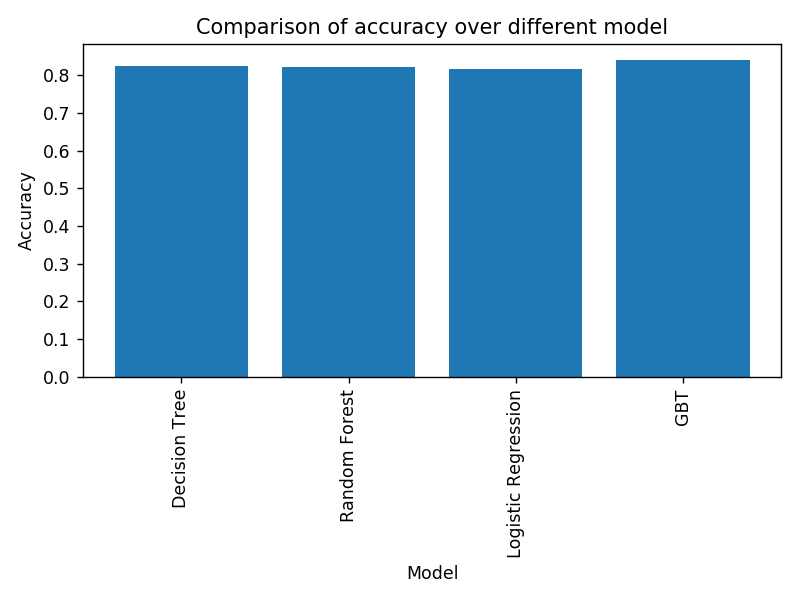

In [33]:
%matplotlib notebook
import matplotlib.pyplot as plt
x_axis = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'GBT']
y_axis = [dt_accuracy, rf_accuracy, lr_accuracy, gbt_accuracy]
plt.bar(x_axis, y_axis)
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of accuracy over different model')
plt.tight_layout()

### Step 09: Calculate the confusion matrix and find the precision, recall, and F1 score of each classification algorithm. Explain how the accuracy of the predication can be improved?
Finding the accuracy of the model does not always represent the quality of the
model for a given dataset. Number of false positive and false negative identification also
plays an important role when we decide about any particular classification model. The
way we can calculate is called confusion matrix. You can use confusionMatrix() method
to calculate the confusion matrix. From the confusion matrix show the precision, recall
and f1 score of each classification model. Explain how you can improve the accuracy of
the predication.

### DecisionTreeClassifier

In [35]:
from pyspark.mllib.evaluation import MulticlassMetrics
predictionRDD_dt = dt_predictions.select(['RainTomorrow_index', 'prediction']).rdd.map(lambda line: (line[1], line[0]))
dt_metrics = MulticlassMetrics(predictionRDD_dt)

# Confusion Matrix
print(dt_metrics.confusionMatrix())

DenseMatrix([[31955.,  1022.],
             [ 6388.,  3088.]])


In [36]:
# Find the precision, recall, and F1 score and show the result
precision = dt_metrics.precision()
recall = dt_metrics.recall()
f1Score = dt_metrics.fMeasure()
print("Summary Stats")
print("Precision = %s" % precision)
print("Recall = %s" % recall)
print("F1 Score = %s" % f1Score)

Summary Stats
Precision = 0.8254540315172073
Recall = 0.8254540315172073
F1 Score = 0.8254540315172073


### RandomForestClassifier

In [37]:
predictionRDD_rf = rf_predictions.select(['RainTomorrow_index', 'prediction']).rdd.map(lambda line: (line[1], line[0]))
rf_metrics = MulticlassMetrics(predictionRDD_rf)

# Confusion Matrix
print(rf_metrics.confusionMatrix())

DenseMatrix([[32313.,   664.],
             [ 6846.,  2630.]])


In [38]:
# Find the precision, recall, and F1 score and show the result
precision = rf_metrics.precision()
recall = rf_metrics.recall()
f1Score = rf_metrics.fMeasure()
print("Summary Stats")
print("Precision = %s" % precision)
print("Recall = %s" % recall)
print("F1 Score = %s" % f1Score)

Summary Stats
Precision = 0.8230984853838362
Recall = 0.8230984853838362
F1 Score = 0.8230984853838362


### LogisticRegression

In [39]:
predictionRDD_lr = lr_predictions.select(['RainTomorrow_index', 'prediction']).rdd.map(lambda line: (line[1], line[0]))
lr_metrics = MulticlassMetrics(predictionRDD_lr)

# Confusion Matrix
print(lr_metrics.confusionMatrix())

DenseMatrix([[30782.,  2195.],
             [ 5575.,  3901.]])


In [40]:
# Find the precision, recall, and F1 score and show the result
precision = lr_metrics.precision()
recall = lr_metrics.recall()
f1Score = lr_metrics.fMeasure()
print("Summary Stats")
print("Precision = %s" % precision)
print("Recall = %s" % recall)
print("F1 Score = %s" % f1Score)

Summary Stats
Precision = 0.8169740654370716
Recall = 0.8169740654370716
F1 Score = 0.8169740654370716


### GBTClassifier

In [41]:
# Get metrics object 
predictionRDD_gbt = gbt_predictions.select(['RainTomorrow_index', 'prediction']).rdd.map(lambda line: (line[1], line[0]))
gbt_metrics = MulticlassMetrics(predictionRDD_gbt)

# Confusion Matrix
print(gbt_metrics.confusionMatrix())

DenseMatrix([[31445.,  1532.],
             [ 5223.,  4253.]])


In [42]:
# Find the precision, recall, and F1 score and show the result
precision = gbt_metrics.precision()
recall = gbt_metrics.recall()
f1Score = gbt_metrics.fMeasure()
print("Summary Stats")
print("Precision = %s" % precision)
print("Recall = %s" % recall)
print("F1 Score = %s" % f1Score)

Summary Stats
Precision = 0.8408828586907875
Recall = 0.8408828586907875
F1 Score = 0.8408828586907875


### How can we improve the accuracy?

One way to improve the accuracy that we already done in previous steps is by using different algorithms and choose the one with better performance. 
Another way to improve the accuracy is by preprocessing the data, what we already did is impute the missing value, but also we can detect and remove the outlier in dataset, which will result in a more accuracy model.